In [ ]:
#BÀI TẬP 3.1.3
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

penguins = pd.read_csv('penguins.csv')                
X_num = penguins.select_dtypes(include=[np.number]).dropna()
penguins_preprocessed = StandardScaler().fit_transform(X_num)

pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4


In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()  

fname = list(uploaded.keys())[0]
print("Uploaded file:", fname)

df = pd.read_csv(io.BytesIO(uploaded[fname]), encoding='latin1')
print("Kích thước dataframe:", df.shape)
df.head()


# Gán lại tên biến cho thống nhất
data = df.copy()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Tiền xử lý dữ liệu
data = data.dropna(subset=['CustomerID'])  # loại bỏ dòng thiếu CustomerID
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']  

# Tính đặc trưng RFM (Frequency, Quantity, Monetary)
rfm = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',      # số hóa đơn
    'Quantity': 'sum',           # tổng sản phẩm mua
    'TotalPrice': 'sum'          # tổng chi tiêu
}).reset_index()

rfm.rename(columns={'InvoiceNo': 'Frequency',
                    'Quantity': 'TotalQuantity',
                    'TotalPrice': 'Monetary'}, inplace=True)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Frequency', 'TotalQuantity', 'Monetary']])

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'o-')
plt.xlabel("Số cụm (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Phương pháp Elbow để chọn K tối ưu")
plt.show()

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster')[['Frequency', 'TotalQuantity', 'Monetary']].mean()
print("\nĐặc trưng trung bình của từng cụm:")
print(cluster_summary)

plt.figure(figsize=(8,6))
plt.scatter(rfm['Monetary'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis')
plt.xlabel("Monetary (Tổng chi tiêu)")
plt.ylabel("Frequency (Số hóa đơn)")
plt.title("Phân cụm khách hàng bằng K-means")
plt.show()



In [ ]:
%pip install pandas matplotlib seaborn scipy scikit-learn numpy

### Nạp thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

✅ All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.3


### Tải và khám phá dữ liệu

In [3]:
# Load the dataset
# Download from: https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
df = pd.read_csv(url)

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (344, 8)

First few rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_

### Tiền xử lý dữ liệu

In [5]:
# Data preprocessing
# Remove rows with missing values
df_clean = df.dropna()

print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_clean)}")

# Select numerical features for clustering
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df_clean[features]

print("\nFeatures selected for clustering:")
print(X.head())

# Save the species labels for later validation
true_labels = df_clean['species']

# Standardize the features (important for hierarchical clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=X.index)

print("Scaled data statistics:")
print(X_scaled_df.describe())

Original dataset size: 344
Cleaned dataset size: 333

Features selected for clustering:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0
Scaled data statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count    3.330000e+02   3.330000e+02       3.330000e+02  3.330000e+02
mean    -1.024206e-15  -1.280257e-15       2.560514e-16 -1.280257e-16
std      1.001505e+00   1.001505e+00       1.001505e+00  1.001505e+00
min     -2.177987e+00  -2.067291e+00      -2.069852e+00 -1.874435e+00
25%     -8.227879e-01  -7.958519e-01      -7.836512e-01 -8.172292e-01
50%      9.288742e-02   6.872642e-02      -2.834620e-01 -1.953432e-01
75%     

### Tạo ma trận khoảng cách và dendrogram

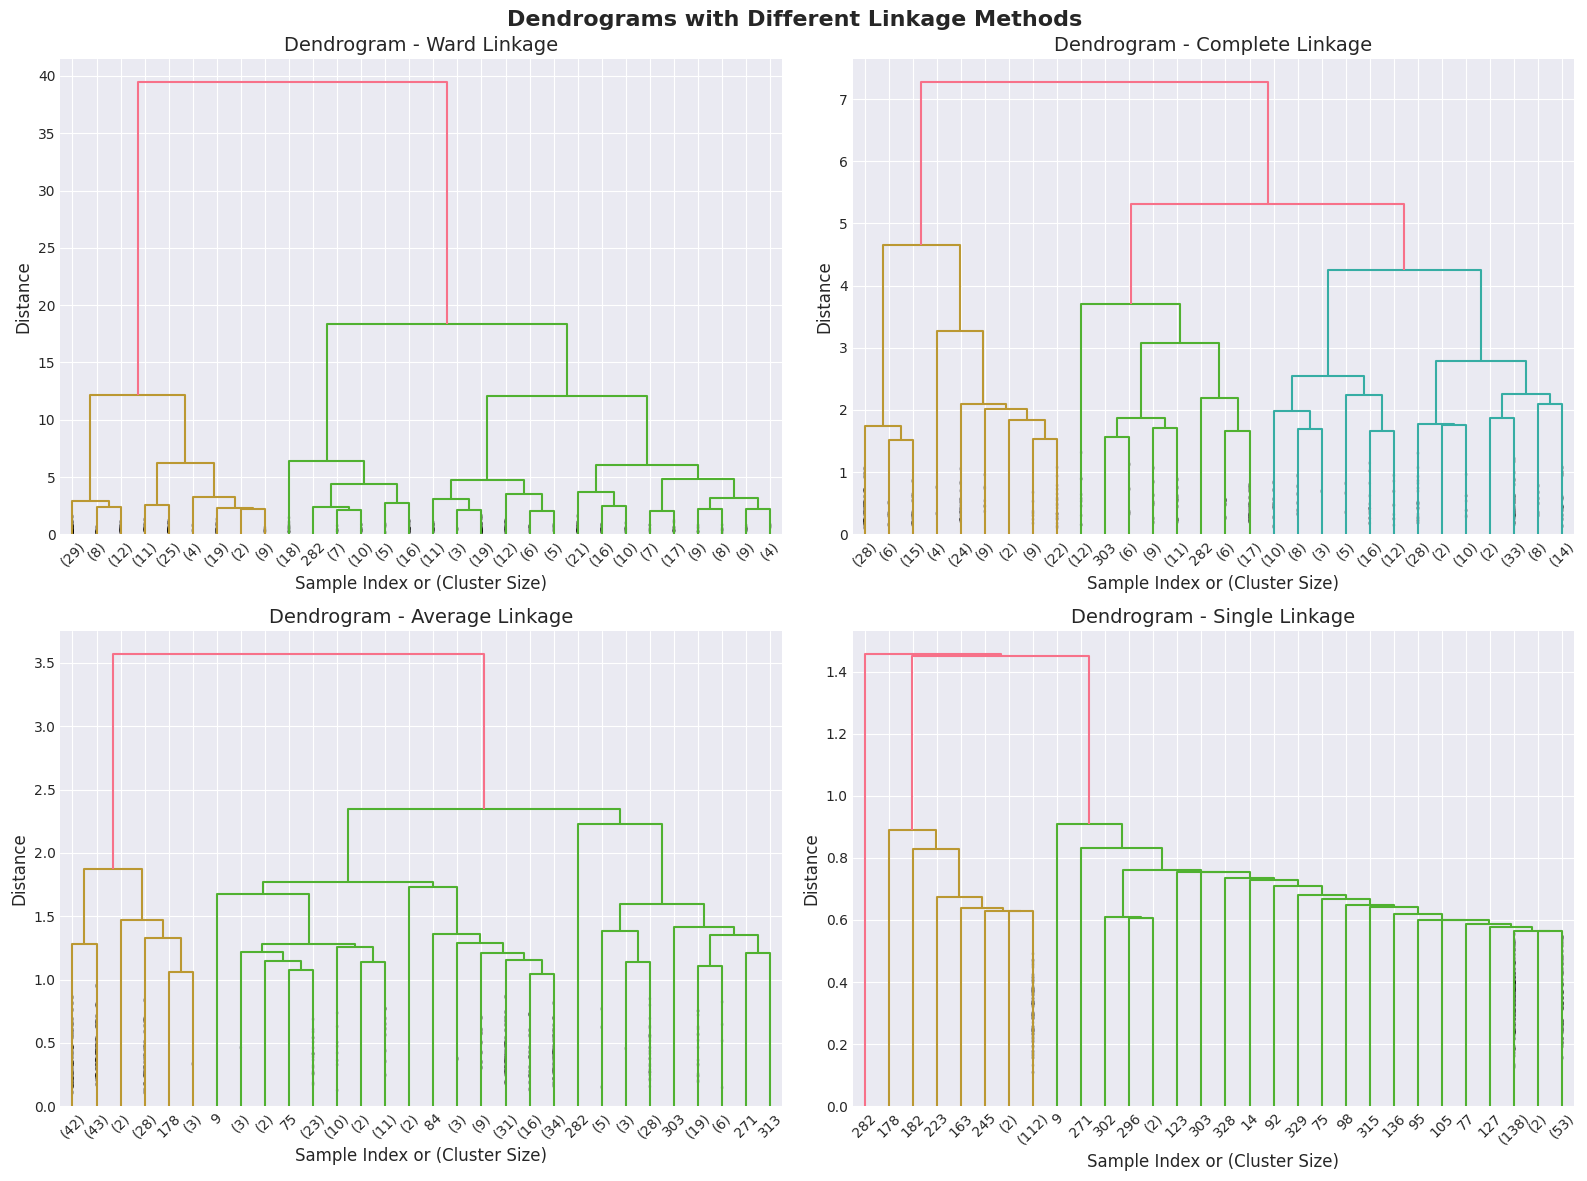

In [6]:
# Calculate linkage matrix using different methods
# Methods: 'single', 'complete', 'average', 'ward'
linkage_methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dendrograms with Different Linkage Methods', fontsize=16, fontweight='bold')

for idx, method in enumerate(linkage_methods):
    row = idx // 2
    col = idx % 2
    
    # Calculate linkage
    Z = linkage(X_scaled, method=method)
    
    # Plot dendrogram
    dendrogram(Z, ax=axes[row, col], truncate_mode='lastp', p=30, 
               leaf_font_size=10, show_contracted=True)
    axes[row, col].set_title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=14)
    axes[row, col].set_xlabel('Sample Index or (Cluster Size)', fontsize=12)
    axes[row, col].set_ylabel('Distance', fontsize=12)

plt.tight_layout()
plt.show()

### Trực quan hóa kết quả phân cụm


Number of clusters: 2
Cluster distribution:
0    214
1    119
Name: count, dtype: int64

Number of clusters: 3
Cluster distribution:
0    119
1    157
2     57
Name: count, dtype: int64

Number of clusters: 4
Cluster distribution:
0    157
1     70
2     57
3     49
Name: count, dtype: int64

Number of clusters: 5
Cluster distribution:
0     57
1     70
2    101
3     49
4     56
Name: count, dtype: int64

Number of clusters: 6
Cluster distribution:
0     70
1     56
2    101
3     49
4     39
5     18
Name: count, dtype: int64


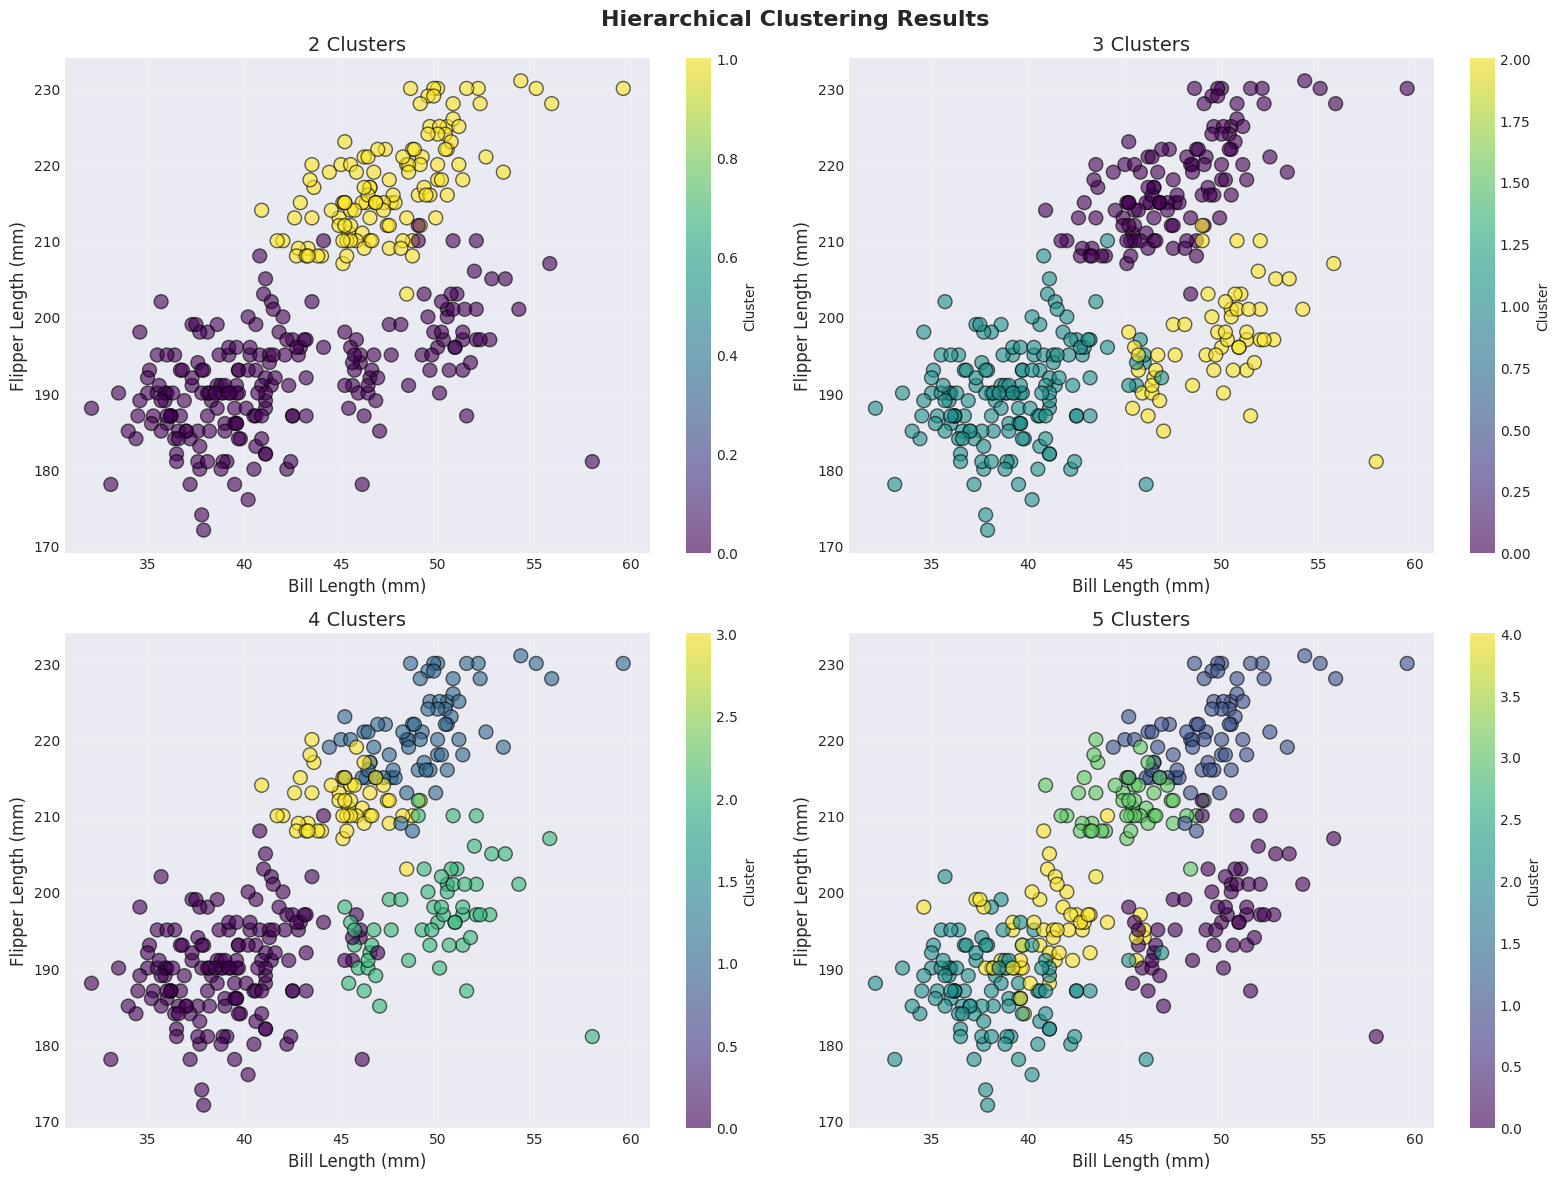

In [8]:
# Try different numbers of clusters
n_clusters_range = range(2, 7)

results = {}

for n_clusters in n_clusters_range:
    # Perform Agglomerative Clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, 
                                          linkage='ward')
    clusters = hierarchical.fit_predict(X_scaled)
    
    results[n_clusters] = clusters
    
    # Add cluster labels to dataframe
    df_clean.loc[:, f'cluster_{n_clusters}'] = clusters
    
    print(f"\n{'='*50}")
    print(f"Number of clusters: {n_clusters}")
    print(f"{'='*50}")
    print(f"Cluster distribution:")
    print(pd.Series(clusters).value_counts().sort_index())

    # Visualize clustering results for different numbers of clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Hierarchical Clustering Results', fontsize=16, fontweight='bold')

cluster_configs = [2, 3, 4, 5]

for idx, n_clusters in enumerate(cluster_configs):
    row = idx // 2
    col = idx % 2
    
    # Use PCA or select two features for 2D visualization
    # Here we use bill_length_mm vs flipper_length_mm
    scatter = axes[row, col].scatter(X['bill_length_mm'], 
                                     X['flipper_length_mm'],
                                     c=results[n_clusters], 
                                     cmap='viridis',
                                     s=100, 
                                     alpha=0.6,
                                     edgecolors='black')
    
    axes[row, col].set_xlabel('Bill Length (mm)', fontsize=12)
    axes[row, col].set_ylabel('Flipper Length (mm)', fontsize=12)
    axes[row, col].set_title(f'{n_clusters} Clusters', fontsize=14)
    axes[row, col].grid(True, alpha=0.3)
    
    # Add colorbar
    plt.colorbar(scatter, ax=axes[row, col], label='Cluster')

plt.tight_layout()
plt.show()

### Import các thư viện cần thiết

In [34]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

### Tải và tiền xử lý dữ liệu

In [35]:
# Đọc file dữ liệu (đảm bảo file 'OnlineRetail.csv' nằm cùng thư mục)
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')


# 1. Loại bỏ các dòng không có mã khách hàng
df.dropna(subset=['CustomerID'], inplace=True)


# 2. Loại bỏ các giao dịch trả hàng (Quantity < 0)
df = df[df['Quantity'] > 0]


# 3. Chuyển CustomerID sang kiểu số nguyên
df['CustomerID'] = df['CustomerID'].astype(int)


# 4. Tạo cột Tổng tiền (TotalPrice)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


# 5. Chuyển cột InvoiceDate sang kiểu datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")

### Tính các đặc trưng RFM (Recency – Frequency – Monetary

In [36]:
# Xác định ngày chụp (snapshot_date) là ngày giao dịch cuối cùng + 1 ngày
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)


# Gom nhóm theo CustomerID để tính Recency, Frequency và Monetary
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                        # Frequency
    'TotalPrice': 'sum'                                            # Monetary
})


# Đổi tên các cột cho dễ hiểu
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)


print(rfm.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12347             2          7        4310.00
12348            75          4        1797.24
12349            19          1        1757.55
12350           310          1         334.40


### Chuẩn hóa dữ liệu

In [37]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

### Xây dựng mô hình phân cụm đa cấp (Hierarchical Clustering)

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


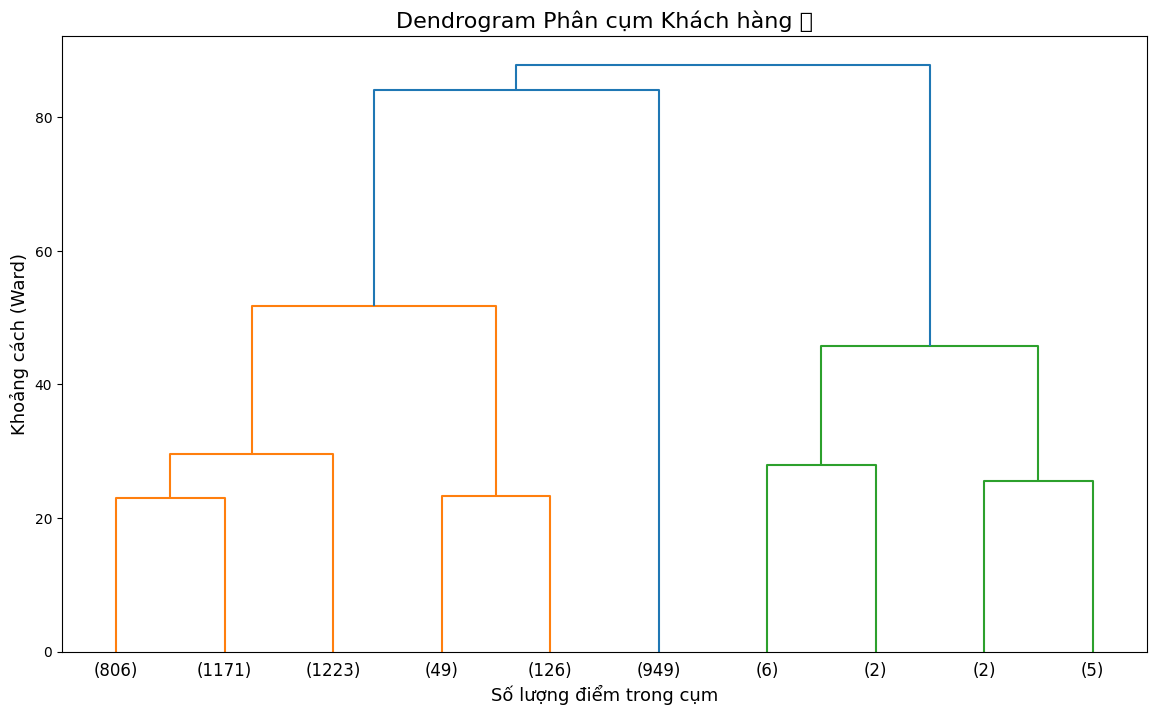

In [38]:
# Tạo ma trận liên kết bằng phương pháp Ward
linked = linkage(rfm_scaled, method='ward')


# Vẽ biểu đồ Dendrogram
plt.figure(figsize=(14, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',   # Hiển thị p cụm cuối cùng
           p=10                     # ✅ p=10 là giá trị tối ưu cho dataset này
          )
plt.title('Dendrogram Phân cụm Khách hàng 🌳', fontsize=16)
plt.xlabel('Số lượng điểm trong cụm', fontsize=13)
plt.ylabel('Khoảng cách (Ward)', fontsize=13)
plt.show()

### Xây dựng mô hình Agglomerative Clustering

In [39]:
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_cluster.fit_predict(rfm_scaled)


# Gán nhãn cụm vào bảng RFM
rfm['Cluster'] = labels

### Phân tích kết quả

In [40]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).round(2)


print("\n📊 Tóm tắt đặc trưng trung bình của các cụm khách hàng:")
print(cluster_summary)


📊 Tóm tắt đặc trưng trung bình của các cụm khách hàng:
         Recency  Frequency  MonetaryValue
Cluster                                   
0          45.93       4.70        2014.42
1           6.73      83.60      111916.31
2         259.54       1.49         457.31


### Trực quan hóa kết quả

<Axes: xlabel='Frequency', ylabel='MonetaryValue'>

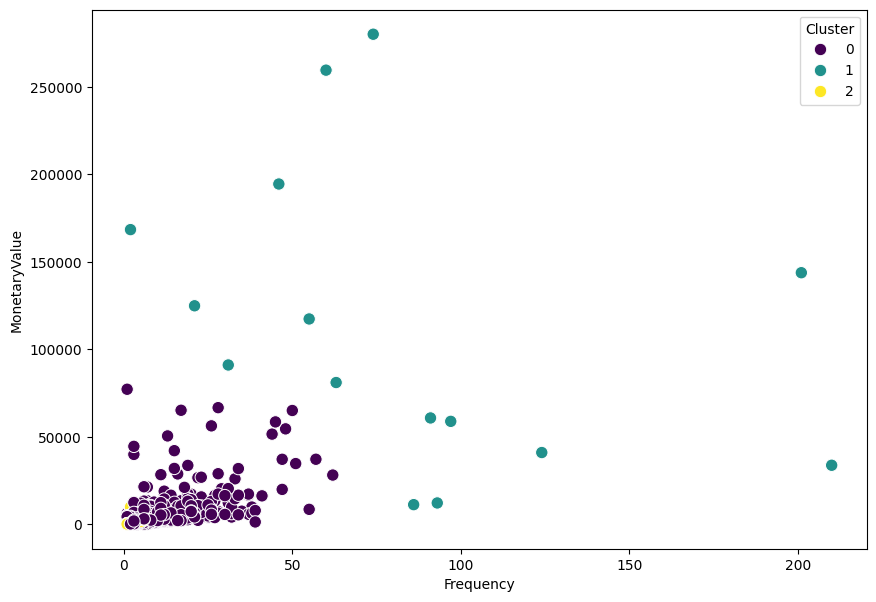

In [41]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=rfm, x='Frequency', y='MonetaryValue',
                hue='Cluster', palette='viridis', s=80)

### Đánh giá nhanh mô hình phân cụm

In [42]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(rfm_scaled, labels)
print("\nSilhouette Score cho mô hình phân cụm khách hàng: ", round(sil_score, 3))


Silhouette Score cho mô hình phân cụm khách hàng:  0.587
